In [145]:
from xgboost import plot_importance
%run objects

/Users/nickbachelder/Desktop/Kaggle/Madness/objects.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tourney_seeds = pd.read_csv('data/tourney_seeds.csv').query("Season >= 2003")


In [146]:
# create trainer
x = trainer(n_games = 10, system = "POM")

# create labels
x.label_and_data_maker()

Getting Mens Training Data:


100%|██████████| 19/19 [00:38<00:00,  2.03s/it]


Getting Womens Training Data:


100%|██████████| 19/19 [00:30<00:00,  1.60s/it]


In [147]:
# Train model
x.train()

Training for each year up to 2023. Final mens and womens model are trained on all data ip to 2023...
Mens accuracy for 2015 is 70.15 percent. MSE is 0.1969120055437088. Log loss is 0.576908
Womens accuracy for 2015 is 84.13 percent. MSE is 0.12135499715805054. Log loss is 0.403761
Mens accuracy for 2016 is 64.18 percent. MSE is 0.25384101271629333. Log loss is 0.806407
Womens accuracy for 2016 is 73.02 percent. MSE is 0.20624199509620667. Log loss is 0.798657
Mens accuracy for 2017 is 76.12 percent. MSE is 0.17108500003814697. Log loss is 0.533849
Womens accuracy for 2017 is 76.19 percent. MSE is 0.19526399672031403. Log loss is 0.670311
Mens accuracy for 2018 is 74.63 percent. MSE is 0.20696499943733215. Log loss is 0.740298
Womens accuracy for 2018 is 76.19 percent. MSE is 0.18866600096225739. Log loss is 0.603672
Mens accuracy for 2019 is 68.66 percent. MSE is 0.1910810023546219. Log loss is 0.555702
Womens accuracy for 2019 is 79.37 percent. MSE is 0.1422179937362671. Log loss is 0

In [148]:
# create 2023 tournement object
tourney_2023 = tournament(year=2023, mens_model=x.model_men, womens_model = x.model_women, n_games = 10, system = "POM")


In [150]:
# predict all for submission
submission = tourney_2023.predict_all_including_non_possible()
submission.to_csv("submission_1.csv", index = False)

Getting 2023 mens tournement predicitions...


100%|██████████| 65703/65703 [09:40<00:00, 113.27it/s]


Getting 2023 womens tournement predicitions.


100%|██████████| 64980/64980 [08:44<00:00, 123.80it/s]


In [154]:
# simulate tournemnets for bracket completion
mens_sim = tourney_2023.predict_exact_tourney(gender = "M", print_results=True)

Simulating Round 0...
Seed W16b. TX Southern beats seed W16a F Dickinson (with probability 0.7382471859455109)
Seed X16b. TAM C. Christi beats seed X16a SE Missouri St (with probability 0.7537201792001724)
Seed Y11b. Pittsburgh beats seed Y11a Mississippi St (with probability 0.3164677619934082)
Seed Z11b. Nevada beats seed Z11a Arizona St (with probability 0.48639875650405884)
Simulating Round 1...
Seed W01. Purdue beats seed W16 TX Southern (with probability 0.8677641749382019)
Seed W02. Marquette beats seed W15 Vermont (with probability 0.7784445285797119)
Seed W03. Kansas St beats seed W14 Montana St (with probability 0.9240196347236633)
Seed W04. Tennessee beats seed W13 Louisiana (with probability 0.9429371953010559)
Seed W05. Duke beats seed W12 Oral Roberts (with probability 0.5061190128326416)
Seed W06. Kentucky beats seed W11 Providence (with probability 0.6756964325904846)
Seed W07. Michigan St beats seed W10 USC (with probability 0.21459737420082092)
Seed W07. FL Atlantic b

In [159]:
# get team round probabilities
tourney_2023.get_team_round_probabilities(gender = "M")[0:50]

,TeamName,Round of 64,Round of 32,Sweet 16,Elite Eight,Final Four,Championship,Champion
0,Houston,100.000,97.754,95.107,90.081,76.420,52.006,43.302
1,UCLA,100.000,97.409,91.432,47.282,37.888,21.756,18.860
2,Tennessee,100.000,94.294,78.382,58.475,40.755,24.422,7.653
3,Alabama,100.000,99.639,92.805,84.177,62.235,36.101,6.434
4,Kansas,100.000,98.177,78.556,48.743,13.566,6.435,3.880
5,Gonzaga,100.000,93.198,80.985,49.772,30.782,8.192,3.814
6,Marquette,100.000,77.844,24.649,21.429,7.898,5.758,3.720
7,Purdue,100.000,89.830,70.210,27.425,14.880,10.538,3.500
8,Xavier,100.000,99.230,84.160,52.789,11.657,4.594,2.721
9,Connecticut,100.000,92.073,49.475,25.725,10.652,2.458,1.400


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

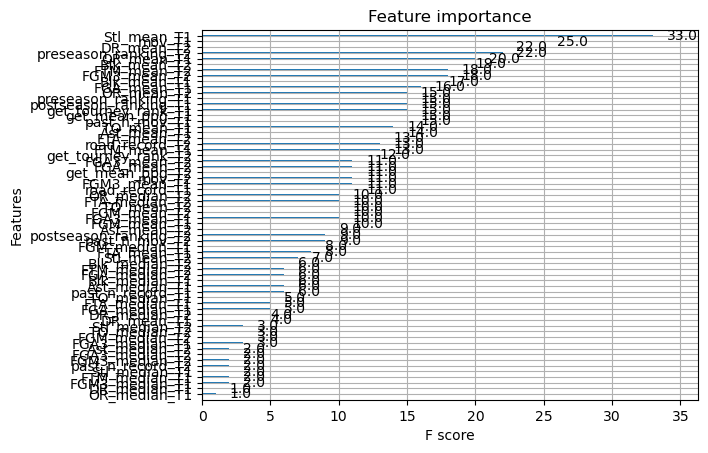

In [153]:
# Sort of odd feaure importance (steals?). We should do more feauture engineering

model = x.model_men.xgb
plot_importance(model)

In [176]:
season_game_results.query("TeamID == 1345 & Season == 2023")

,M_W,Season,DayNum,TeamID,OppTeamID,Score,OppScore,Loc,FGM,FGA,...,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result,mov
102162,W,2023,8,1345,1454,84,53,H,27,72,...,22,20,29,18,10,14,11,13,1,31
102258,W,2023,11,1345,1122,63,44,H,24,48,...,17,9,27,13,14,2,2,17,1,19
102428,W,2023,15,1345,1266,75,70,H,27,56,...,18,5,28,12,6,3,5,10,1,5
102894,W,2023,24,1345,1452,80,68,N,24,47,...,28,9,24,15,17,6,3,20,1,12
102946,W,2023,25,1345,1211,84,66,N,29,61,...,22,11,32,21,8,3,3,13,1,18
103087,W,2023,27,1345,1181,75,56,N,26,58,...,19,14,27,17,11,7,3,16,1,19
103194,W,2023,30,1345,1199,79,69,A,26,56,...,31,9,32,14,11,1,1,15,1,10
103391,W,2023,34,1345,1278,89,70,H,33,65,...,18,10,28,22,7,5,2,13,1,19
103488,W,2023,37,1345,1220,85,66,H,30,62,...,20,13,28,20,8,3,4,13,1,19
103585,W,2023,40,1345,1304,65,62,A,23,58,...,20,13,32,10,12,3,7,17,1,3


In [180]:
def get_strength_of_schedule(team_id):
    this = season_rankings.query("TeamID == @team_id & Season == 2023")
    this2 = season_game_results.query("TeamID == @team_id & Season == 2023")
    this3 = season_rankings.query("Season == 2023")
    last_n_opponents = this2.sort_values('DayNum', ascending=False).OppTeamID
    last_n_day_nums = this2.sort_values('DayNum', ascending=False).DayNum
    opp_ranks = pd.DataFrame()
    team_seed = tourney_seeds.query("TeamID == @team_id & Season == 2023").ReigonSeed.iloc[0]
    for opp_team, day in dict(zip(last_n_opponents, last_n_day_nums)).items():
        win_loss = this2.query("TeamID == @team_id & OppTeamID == @opp_team & DayNum == @day").iloc[0].Result
        try:
            rank = this3.query("TeamID == @opp_team & RankingDayNum <= @day").sort_values('RankingDayNum', ascending=False).iloc[0].OrdinalRank
        except IndexError:
            rank = this3.query("TeamID == @opp_team").sort_values('RankingDayNum', ascending=True).iloc[0].OrdinalRank
        opp_ranks = pd.concat([opp_ranks, pd.DataFrame({'tourney_seed' : team_seed, 'team_id' : [team_id], 'opp_team_id' : [opp_team], 'opponent_rank' : [rank], 'win' : win_loss})])
    return opp_ranks

ret = pd.DataFrame()
for team_id in tqdm(tourney_teams_2023):
    ret = pd.concat([ret, get_strength_of_schedule(team_id)], axis = 0)

ret = ret.merge(teams.rename(columns = {"TeamID" : "team_id", "TeamName" : "team_name"})[["team_id", "team_name"]], on = "team_id", how = "left")
ret = ret.merge(teams.rename(columns = {"TeamID" : "opp_team_id", "TeamName" : "opp_team_name"})[["opp_team_id", "opp_team_name"]], on = "opp_team_id", how = "left")
ret[["tourney_seed", "team_name", "opp_team_name", "opponent_rank", "win"]].to_csv("strength_of_schedule_analysis.csv")

100%|██████████| 68/68 [00:09<00:00,  7.13it/s]


In [160]:
def get_mean_strength_of_schedule(team_id):
    this = season_rankings.query("TeamID == @team_id & Season == 2023")
    this2 = season_game_results.query("TeamID == @team_id & Season == 2023")
    this3 = season_rankings.query("Season == 2023")
    last_n_opponents = this2.sort_values('DayNum', ascending=False).OppTeamID
    last_n_day_nums = this2.sort_values('DayNum', ascending=False).DayNum
    opp_ranks = []
    for team, day in dict(zip(last_n_opponents, last_n_day_nums)).items():
        try:
            rank = this3.query("TeamID == @team & RankingDayNum <= @day").sort_values('RankingDayNum', ascending=False).iloc[0].OrdinalRank
        except IndexError:
            rank = this3.query("TeamID == @team").sort_values('RankingDayNum', ascending=True).iloc[0].OrdinalRank
        opp_ranks.append(rank)
    return pd.DataFrame({"TeamID" : [team_id], "past_n_games_mean_rank": [sum(opp_ranks)/len(opp_ranks)]})

ret = pd.DataFrame()
for team_id in tqdm(tourney_teams_2023):
    ret = pd.concat([ret, get_mean_strength_of_schedule(team_id)], axis = 0)

ret = ret.merge(teams[['TeamID', 'TeamName']], on = "TeamID", how = "left")


100%|██████████| 68/68 [00:06<00:00, 10.62it/s]


,TeamID,past_n_games_mean_rank,TeamName
0,1345,108.375000,Purdue
1,1266,136.952381,Marquette
2,1243,112.045455,Kansas St
3,1397,98.115385,Tennessee
4,1181,127.440000,Duke
...,...,...,...
63,1433,173.111111,VCU
64,1233,195.666667,Iona
65,1213,153.652174,Grand Canyon
66,1421,239.300000,UNC Asheville


In [173]:
def check_submission_probs(team_name_1, team_name_2):
    sub = pd.read_csv("submission_1.csv")
    team_id_1 = teams.query("TeamName == @team_name_1").iloc[0].TeamID
    team_id_2 = teams.query("TeamName == @team_name_2").iloc[0].TeamID
    team_ids = [team_id_1, team_id_2]
    game_id = f"2023_{min(team_ids)}_{max(team_ids)}"
    entry = sub.query("ID == @game_id")
    if team_id_1 == min(team_ids):
        return f"The probability of {team_name_1} beating {team_name_2} is {round(entry.Pred.iloc[0], 3)}"
    else:
        return f"The probability of {team_name_1} beating {team_name_2} is {1 - round(entry.Pred.iloc[0], 3)}"

check_submission_probs(team_name_1 = "West Virginia", team_name_2 = "Maryland")

'The probability of West Virginia beating Maryland is 0.679'